# **Random Forest** 

## **I. Algorithm Principle**

![ML](../../../../doc/doc_randomForest/RF_img1.png)

![ML](../../../../doc/doc_randomForest/RF_img2.png)

## **1. 思想**
<br>Random Forest（随机森林），用随机的方式建立一个森林。RF 算法由很多决策树组成，每一棵决策树之间没有关联。建立完森林后，当有新样本进入时，每棵决策树都会分别进行判断，然后基于投票法给出分类结果，属于Bagging 的扩展变体，它在以决策树为基学习器构建 Bagging 集成的基础上，进一步在决策树的训练过程中引入了随机特征选择，因此可以概括 RF 包括四个部分：

* 随机选择样本（放回抽样）；
* 随机选择特征；
* 构建决策树；
* 随机森林投票(平均);

<br>随机选择样本和 Bagging 相同，采用的是 Bootstrap 自助采样法；随机选择特征是指在每个节点在分裂过程中都是随机选择特征的（区别与每棵树随机选择一批特征）。

<br/>这种随机性导致随机森林的偏差会有稍微的增加（相比于单棵不随机树），但是由于随机森林的“平均”特性，会使得它的方差减小，而且方差的减小补偿了偏差的增大，因此总体而言是更好的模型。

<br/>随机采样由于引入了两种采样方法保证了随机性，所以每棵树都是最大可能的进行生长就算不剪枝也不会出现过拟合。

## **2. 优缺点**
**优点**

* 在数据集上表现良好，相对于其他算法有较大的优势；
* 易于并行化，在大数据集上有很大的优势；
* 能够处理高维度数据，不用做特征选择；

**缺点**
* 随机森林已经被证明在某些噪音较大的分类或回归问题上会过拟合；
* 对于有不同取值的属性的数据，取值划分较多的属性会对随机森林产生更大的影响，所以随机森林在这种数据上产出的属性权值是不可信的。

## **II. Drunk Driving detection based on Random Forest**

## **1. Example Explain**
数据集为从Github[@wartenhx](https://github.com/wartenhx/Drunk_Driving)下载的醉酒驾驶车辆行为参数数据集，共有265个数据样本，样本特征有'Speed','Acceleration','EngineRevolution','Accelerator','Clutch','Brake','Steering','Gear','DistanceToCenterOfLane'等，样本标签1代表Drunk Driving，标签0代表not Drunk Driving.

## **2. Random Forest —— sklearn implementation**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image  
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

import pydotplus
import os  

In [13]:
# 加载数据
dataPath = '../../../../data/data_drunkDriving'
resultsPath = '../../../../results/results_drunkDriving'
df = pd.read_csv(dataPath+'/data.csv')

In [7]:
# 查看数据
df.head()

,Speed,Acceleration,EngineRevolution,Accelerator,Clutch,Brake,Steering,Switches,Gear,WheelSlip,DistanceToCenterOfLane,PX,PY,PZ,category,output
0,22.429807,0.082253,265.046548,0.164597,0.992197,0.003707,-0.032688,0.0,4.0,0.00000,2.660644,1254.288839,4217.311259,-0.01,200Y,1
1,23.883663,-0.668780,282.525833,0.416795,0.995969,0.163153,-0.246761,0.0,4.0,13.72549,3.755827,-4188.509085,5616.163905,0.00,200Y,1
2,19.276503,0.097968,227.774718,0.159092,0.961205,0.000000,-0.028083,0.0,4.0,0.00000,2.251745,1811.828461,5999.674140,-0.01,200Y,1
3,21.014289,-0.057411,171.950735,0.206029,0.999977,0.020285,-0.038532,0.0,5.0,0.00000,2.729846,-4196.767713,5599.723250,0.00,200Y,1
4,22.299331,-0.292891,182.528952,0.255531,0.995539,0.063279,-0.039754,0.0,5.0,0.00000,2.169300,1812.517617,6001.647345,-0.01,200Y,1


In [8]:
# 加载特征和标签
X_name =['Speed','Acceleration','EngineRevolution','Accelerator','Clutch','Brake','Steering','Switches','Gear','WheelSlip','DistanceToCenterOfLane']
# X_name = ['Speed','Acceleration','EngineRevolution','Accelerator','Clutch','Brake','Steering','Gear','DistanceToCenterOfLane']
X = df[X_name]
y_label = ['not drunk','drunk']
y = df['output']

In [9]:
# 划分测试集和训练集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [10]:
# 训练模型
clf = RandomForestClassifier(n_estimators=100,max_features = len(X_name)).fit(X_train, y_train)

In [11]:
# 测试模型
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.73


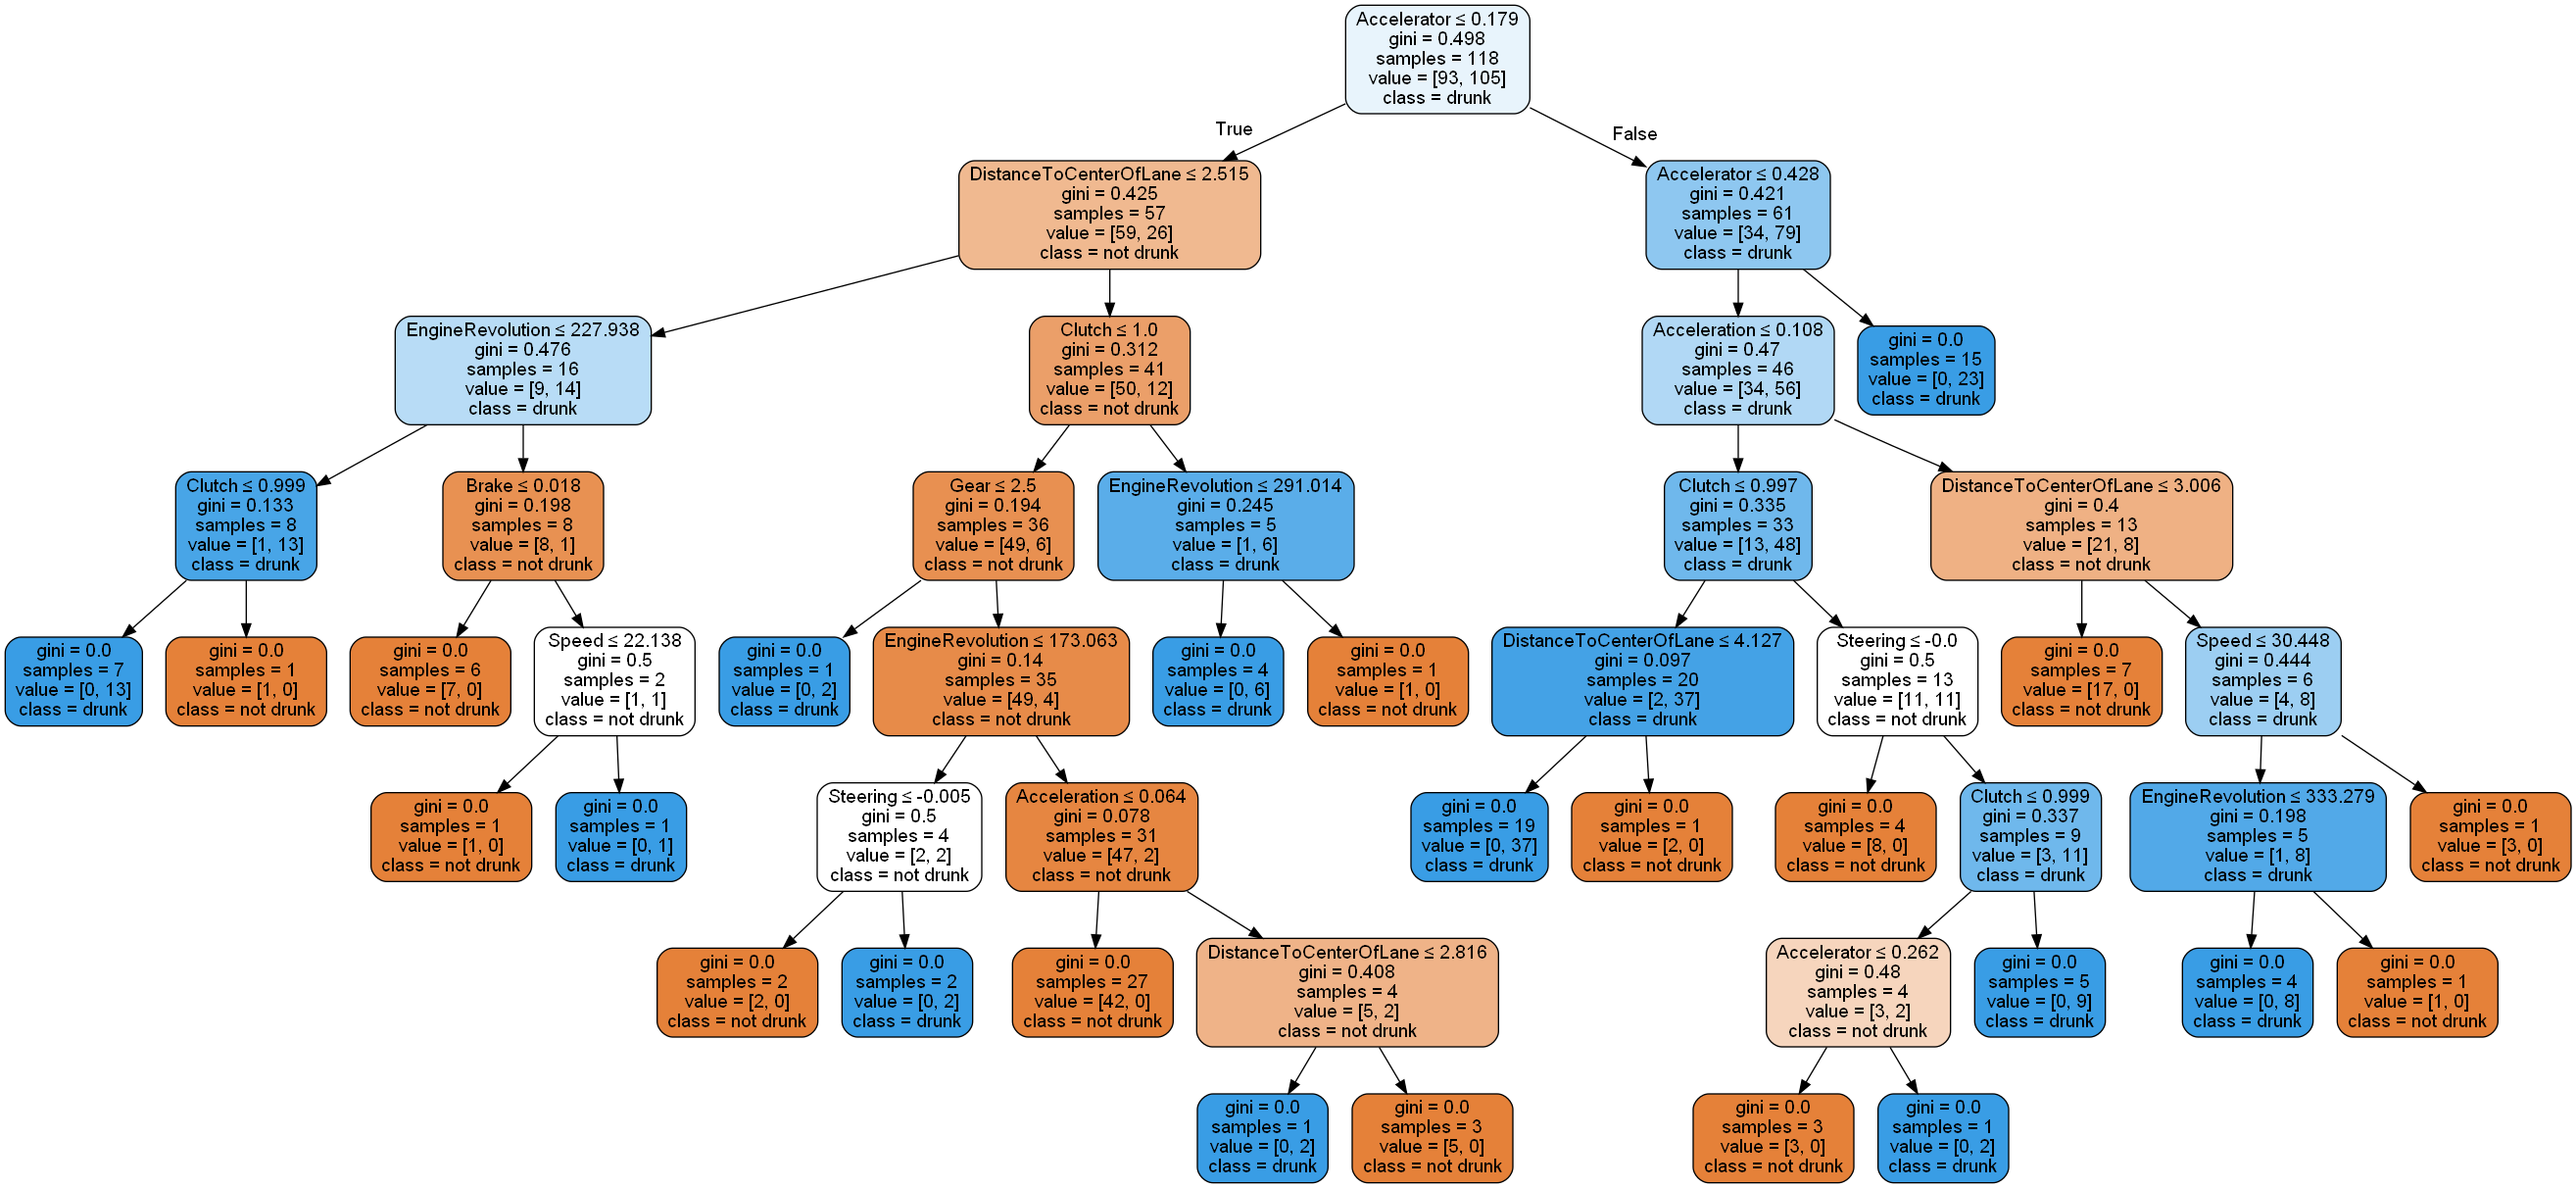

In [14]:
# 绘制树
estimators = clf.estimators_[0:10]
for index, model in enumerate(estimators):
    filename = resultsPath + 'RF_' + str(index) + '.pdf'
    dot_data = export_graphviz(model,
                               out_file=None,
                               feature_names=X_name,
                               class_names=y_label,
                               filled=True,
                               rounded=True,
                               special_characters=True)
    graph = graph_from_dot_data(dot_data)
    # 使用ipython的终端jupyter notebook显示。
    # Image(graph.create_png())
    graph.write_pdf(filename)
Image(graph.create_png())

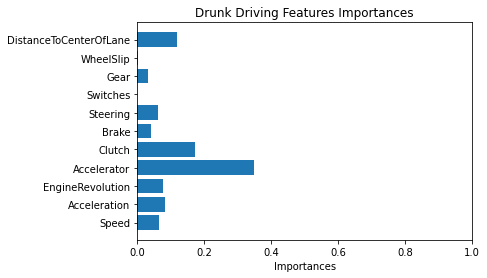

In [15]:
# 决策树特征权重可视化
y_importances = clf.feature_importances_
x_importances = X_name
y_pos = np.arange(len(x_importances))
# 横向柱状图
plt.barh(y_pos, y_importances, align='center')
plt.yticks(y_pos, x_importances)
plt.xlabel('Importances')
plt.xlim(0, 1)
plt.title('Drunk Driving Features Importances')
plt.show()